In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

This is the extract data for the computed centres. Graphical plots of the results in relation to their relative differences

In [34]:
names = ('Image', 'Centre')

fitting_centres = pd.read_csv("Fit_circle_center1.csv", sep=",", names=names)
fitting_centres.head()

,Image,Centre
0,IMG_13028_2024-02-05_10-19-23.jpg,"(165, 199)"
1,IMG_13029_2024-02-05_10-24-31.jpg,"(164, 188)"
2,IMG_13030_2024-02-05_10-29-39.jpg,"(163, 189)"
3,IMG_13031_2024-02-05_10-34-47.jpg,"(167, 195)"
4,IMG_13032_2024-02-05_10-39-55.jpg,"(167, 196)"


Generate a column for timestamps

In [35]:
fitting_centres['x_centre[px]'] = fitting_centres['Centre'].apply(lambda x: int(x[1:4]))
fitting_centres['y_centre[px]'] = fitting_centres['Centre'].apply(lambda x: int(x[6:9]))
fitting_centres['datetime'] = fitting_centres['Image'].apply(lambda x: str(x[10:29]))

fitting_centres.head(20)

,Image,Centre,x_centre[px],y_centre[px],datetime
0,IMG_13028_2024-02-05_10-19-23.jpg,"(165, 199)",165,199,2024-02-05_10-19-23
1,IMG_13029_2024-02-05_10-24-31.jpg,"(164, 188)",164,188,2024-02-05_10-24-31
2,IMG_13030_2024-02-05_10-29-39.jpg,"(163, 189)",163,189,2024-02-05_10-29-39
3,IMG_13031_2024-02-05_10-34-47.jpg,"(167, 195)",167,195,2024-02-05_10-34-47
4,IMG_13032_2024-02-05_10-39-55.jpg,"(167, 196)",167,196,2024-02-05_10-39-55
5,IMG_13033_2024-02-05_10-45-03.jpg,"(164, 194)",164,194,2024-02-05_10-45-03
6,IMG_13034_2024-02-05_10-50-11.jpg,"(166, 196)",166,196,2024-02-05_10-50-11
7,IMG_13035_2024-02-05_10-55-19.jpg,"(165, 198)",165,198,2024-02-05_10-55-19
8,IMG_13036_2024-02-05_11-00-27.jpg,"(163, 192)",163,192,2024-02-05_11-00-27
9,IMG_13037_2024-02-05_11-05-35.jpg,"(163, 188)",163,188,2024-02-05_11-05-35


Using the ratio calculated from the modal diameter/radius, generate the centres in mm

In [36]:
# ratio for conversion to millimeters is calculated from the detection script

ratio = 0.43709693

fitting_centres['x_centre[mm]'] = fitting_centres['x_centre[px]']*ratio
fitting_centres['y_centre[mm]'] = fitting_centres['y_centre[px]']*ratio
fitting_centres=fitting_centres[['Image','datetime','x_centre[px]','y_centre[px]','x_centre[mm]','y_centre[mm]']]
fitting_centres.sort_values(by ='Image')

,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm]
0,IMG_13028_2024-02-05_10-19-23.jpg,2024-02-05_10-19-23,165,199,72.120993,86.982289
1,IMG_13029_2024-02-05_10-24-31.jpg,2024-02-05_10-24-31,164,188,71.683897,82.174223
2,IMG_13030_2024-02-05_10-29-39.jpg,2024-02-05_10-29-39,163,189,71.246800,82.611320
3,IMG_13031_2024-02-05_10-34-47.jpg,2024-02-05_10-34-47,167,195,72.995187,85.233901
4,IMG_13032_2024-02-05_10-39-55.jpg,2024-02-05_10-39-55,167,196,72.995187,85.670998
5,IMG_13033_2024-02-05_10-45-03.jpg,2024-02-05_10-45-03,164,194,71.683897,84.796804
6,IMG_13034_2024-02-05_10-50-11.jpg,2024-02-05_10-50-11,166,196,72.558090,85.670998
7,IMG_13035_2024-02-05_10-55-19.jpg,2024-02-05_10-55-19,165,198,72.120993,86.545192
8,IMG_13036_2024-02-05_11-00-27.jpg,2024-02-05_11-00-27,163,192,71.246800,83.922611
9,IMG_13037_2024-02-05_11-05-35.jpg,2024-02-05_11-05-35,163,188,71.246800,82.174223


Calculate the relative differences (rel_diff_x[mm], rel_diff_y[mm]) between subsequent centres.

In [37]:
fitting_centres['rel_diff_x[mm]']=  fitting_centres['x_centre[mm]'].diff()

fitting_centres['rel_diff_y[mm]']=  fitting_centres['y_centre[mm]'].diff()

fitting_centres[['rel_diff_x[mm]','rel_diff_y[mm]']]= fitting_centres[['rel_diff_x[mm]','rel_diff_y[mm]']].fillna(0)

print(fitting_centres)

                                Image             datetime  x_centre[px]  \
0   IMG_13028_2024-02-05_10-19-23.jpg  2024-02-05_10-19-23           165   
1   IMG_13029_2024-02-05_10-24-31.jpg  2024-02-05_10-24-31           164   
2   IMG_13030_2024-02-05_10-29-39.jpg  2024-02-05_10-29-39           163   
3   IMG_13031_2024-02-05_10-34-47.jpg  2024-02-05_10-34-47           167   
4   IMG_13032_2024-02-05_10-39-55.jpg  2024-02-05_10-39-55           167   
5   IMG_13033_2024-02-05_10-45-03.jpg  2024-02-05_10-45-03           164   
6   IMG_13034_2024-02-05_10-50-11.jpg  2024-02-05_10-50-11           166   
7   IMG_13035_2024-02-05_10-55-19.jpg  2024-02-05_10-55-19           165   
8   IMG_13036_2024-02-05_11-00-27.jpg  2024-02-05_11-00-27           163   
9   IMG_13037_2024-02-05_11-05-35.jpg  2024-02-05_11-05-35           163   
10  IMG_13038_2024-02-05_11-10-43.jpg  2024-02-05_11-10-43           165   
11  IMG_13039_2024-02-05_11-15-51.jpg  2024-02-05_11-15-51           165   
12  IMG_1304

A plot of the relative movement of the bridge in the x_direction which is parallel to the direction of gravity travel.

c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


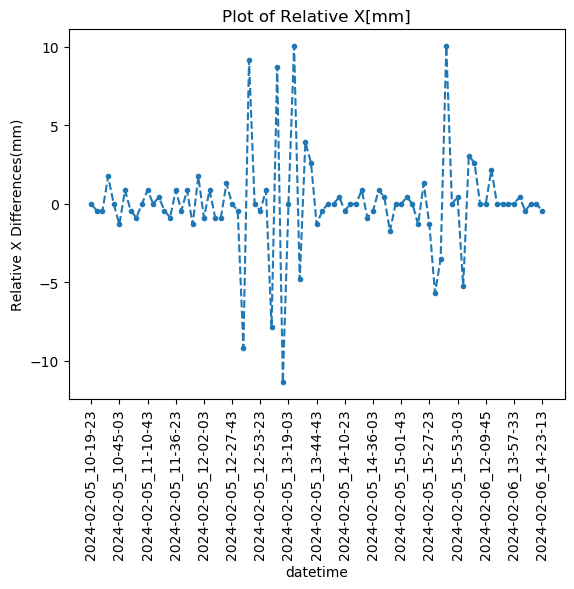

In [38]:
plt.plot(fitting_centres['datetime'], fitting_centres['rel_diff_x[mm]'], '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative X Differences(mm)')  # Adding label to y-axis
#plt.title('Plot of Relative X vs Relative Y Differences')
plt.title('Plot of Relative X[mm]')
plt.xticks(rotation=90)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
#x_axis.set_visible(False)
# Save the combined plot as an image
#combined_image_path =  r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Lab_test_data\images\rel_x_diff_1.jpg"  # Specify the path for saving the image
#plt.savefig(combined_image_path)

# Close the plot to release resources
#plt.close()


ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))

plt.show()

A plot of the relative movement of the bridge in the x_direction which is perpendicular to the direction of gravity travel.


c:\Users\kwayi\anaconda3\envs\hs_nb_env\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


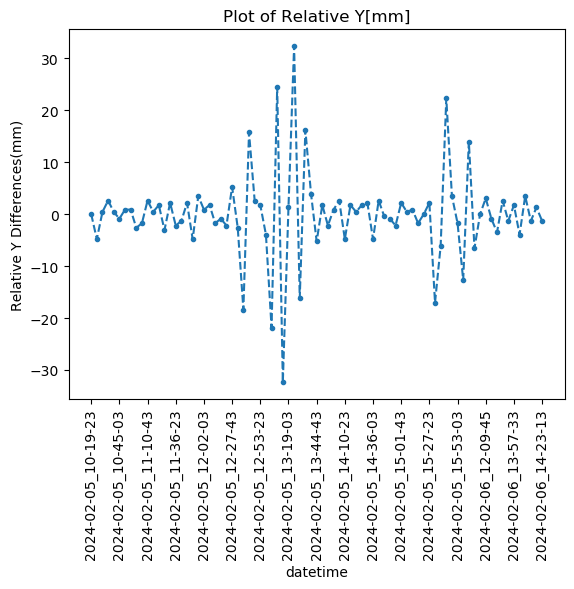

In [39]:
plt.plot(fitting_centres['datetime'], fitting_centres['rel_diff_y[mm]'], '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative Y Differences(mm)')  # Adding label to y-axis
#plt.title('Plot of Relative X vs Relative Y Differences')
plt.title('Plot of Relative Y[mm]')
plt.xticks(rotation=90)

ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
#x_axis.set_visible(False)
# Save the combined plot as an image
#combined_image_path =  r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Lab_test_data\images\rel_x_diff_1.jpg"  # Specify the path for saving the image
#plt.savefig(combined_image_path)

# Close the plot to release resources
#plt.close()


ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))

plt.show()

Finding the standard deviation and standard error for the relative differences

In [40]:
#Compute the standard deviation
standard_deviation_x = np.std(fitting_centres['rel_diff_x[mm]'])
standard_deviation_y = np.std(fitting_centres['rel_diff_y[mm]'])

# Compute the standard error
standard_error_y = fitting_centres['rel_diff_y[mm]'].sem()
standard_error_x = fitting_centres['rel_diff_x[mm]'].sem()


print("Standard deviation for Relative X Differences (mm):", standard_deviation_x)
print("Standard deviation for Relative Y Differences (mm):", standard_deviation_y)
print("Standard Error for Relative X Differences (mm):", standard_error_x)
print("Standard Error for Relative X Differences (mm):", standard_error_y)

Standard deviation for Relative X Differences (mm): 3.166063485258978
Standard deviation for Relative Y Differences (mm): 8.543638778746061
Standard Error for Relative X Differences (mm): 0.3539766587059489
Standard Error for Relative X Differences (mm): 0.955207854223974


Not excluding any outliers, 

standard deviation in  x is 3.166(mm2)

standsard error in y is 0.353mm

standard deviation in  y is 8.543(mm2)

standsard error in y is 0.955mm




In [41]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
fitting_centres.head()

,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm],rel_diff_x[mm],rel_diff_y[mm]
0,IMG_13028_2024-02-05_10-19-23.jpg,2024-02-05_10-19-23,165,199,72.120993,86.982289,0.000000,0.000000
1,IMG_13029_2024-02-05_10-24-31.jpg,2024-02-05_10-24-31,164,188,71.683897,82.174223,-0.437097,-4.808066
2,IMG_13030_2024-02-05_10-29-39.jpg,2024-02-05_10-29-39,163,189,71.246800,82.611320,-0.437097,0.437097
3,IMG_13031_2024-02-05_10-34-47.jpg,2024-02-05_10-34-47,167,195,72.995187,85.233901,1.748388,2.622582
4,IMG_13032_2024-02-05_10-39-55.jpg,2024-02-05_10-39-55,167,196,72.995187,85.670998,0.000000,0.437097


In [42]:

# Read the Excel file
fitted_centres = pd.read_excel(r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\Glenn\updated_fitting_centres.xlsx")

# Display the DataFrame
fitted_centres.head()


,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm],rel_diff_x[mm],rel_diff_y[mm]
0,IMG_13028_2024-02-05_10-19-23.jpg,2024-02-05 10:19:23,165,199,72.120993,86.982289,0.000000,0.000000
1,IMG_13029_2024-02-05_10-24-31.jpg,2024-02-05 10:24:31,164,188,71.683897,82.174223,-0.437097,-4.808066
2,IMG_13030_2024-02-05_10-29-39.jpg,2024-02-05 10:29:39,163,189,71.246800,82.611320,-0.437097,0.437097
3,IMG_13031_2024-02-05_10-34-47.jpg,2024-02-05 10:34:47,167,195,72.995187,85.233901,1.748388,2.622582
4,IMG_13032_2024-02-05_10-39-55.jpg,2024-02-05 10:39:55,167,196,72.995187,85.670998,0.000000,0.437097


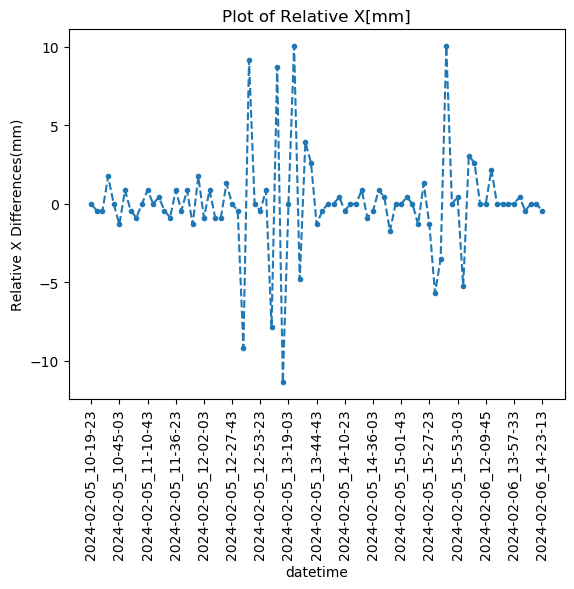

In [43]:
plt.plot( fitting_centres['datetime'],fitting_centres['rel_diff_x[mm]'] , '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative X Differences(mm)')  # Adding label to y-axis
plt.title('Plot of Relative X[mm]')
plt.xticks(rotation=90)

ax1 = plt.gca()
x_axis = ax1.xaxis

# Adjusting the x-axis locator
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))  # Adjust base to 10 for wider range

plt.show()

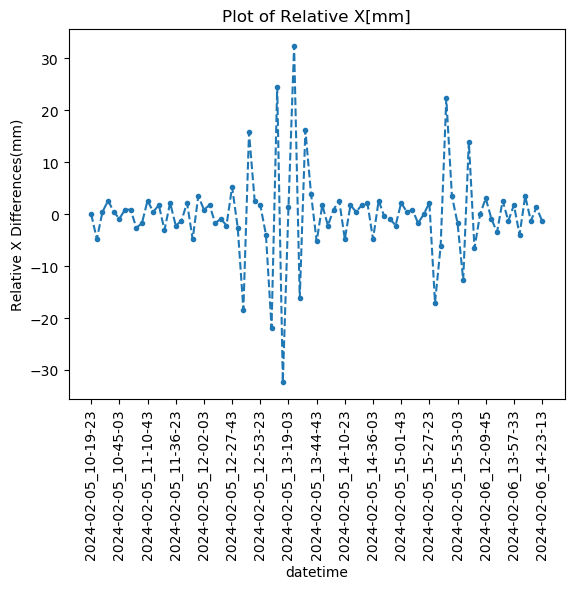

In [44]:
plt.plot( fitting_centres['datetime'],fitting_centres['rel_diff_y[mm]'] , '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative X Differences(mm)')  # Adding label to y-axis
plt.title('Plot of Relative X[mm]')
plt.xticks(rotation=90)

ax1 = plt.gca()
x_axis = ax1.xaxis

# Adjusting the x-axis locator
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))  # Adjust base to 10 for wider range

plt.show()

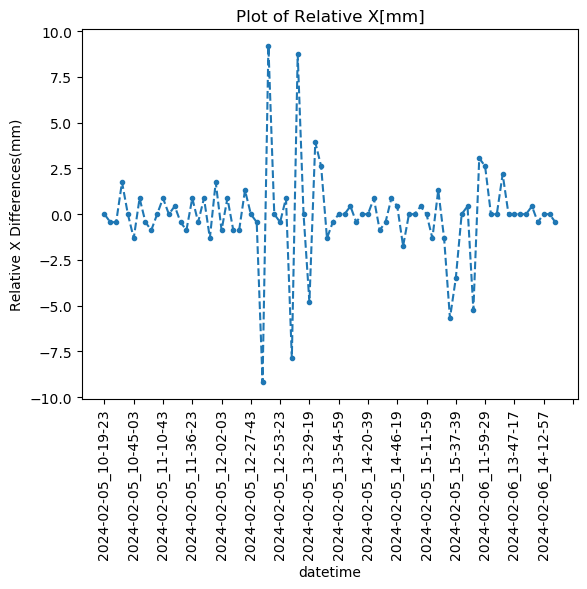

In [45]:
# Conditional masking to filter out values greater than +5 or less than -5
mask_x = (fitting_centres['rel_diff_x[mm]'] <  10) & (fitting_centres['rel_diff_x[mm]'] > -10)
datetime = fitting_centres['datetime'][mask_x]
rel_diff_x = fitting_centres['rel_diff_x[mm]'][mask_x]

plt.plot(datetime, rel_diff_x, '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative X Differences(mm)')  # Adding label to y-axis
plt.title('Plot of Relative X[mm]')
plt.xticks(rotation=90)

ax1 = plt.gca()
x_axis = ax1.xaxis

# Adjusting the x-axis locator
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))  # Adjust base to 10 for wider range

plt.show()



In [46]:
mask_x = (fitting_centres['rel_diff_x[mm]'] < 5) & (fitting_centres['rel_diff_x[mm]'] > -5)
mask_x.describe()

count       81
unique       2
top       True
freq        72
Name: rel_diff_x[mm], dtype: object

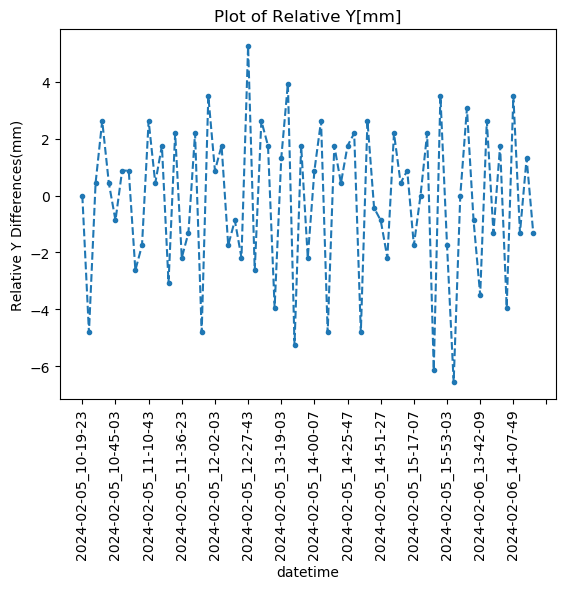

In [47]:
# Conditional masking to filter out values greater than +6 or less than -6
mask_y = (fitting_centres['rel_diff_y[mm]'] < 10) & (fitting_centres['rel_diff_y[mm]'] > -10)
datetime = fitting_centres['datetime'][mask_y]
rel_diff_y = fitting_centres['rel_diff_y[mm]'][mask_y]

plt.plot(datetime, rel_diff_y, '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative Y Differences(mm)')  # Adding label to y-axis
plt.title('Plot of Relative Y[mm]')
plt.xticks(rotation=90)

ax1 = plt.gca()
y_axis = ax1.xaxis

# Adjusting the x-axis locator
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))  # Adjust base to 10 for wider range

plt.show()



In [48]:
mask_y.describe()

count       81
unique       2
top       True
freq        69
Name: rel_diff_y[mm], dtype: object

In [49]:
standard_deviation_x1 = np.std(mask_x)
standard_deviation_y1 = np.std(mask_y)

print("Standard deviation for Relative X Differences (mm):", standard_deviation_x1)
print("Standard deviation for Relative Y Differences (mm):", standard_deviation_y1)

Standard deviation for Relative X Differences (mm): 0.3142696805273545
Standard deviation for Relative Y Differences (mm): 0.3552467795046459


In [50]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#fitting_centres

In [60]:

# Try different encodings if you are unsure which one to use
encodings = ['latin1', 'iso-8859-1', 'cp1252']

for enc in encodings:
    try:
        hydro = pd.read_csv("05-07--02-2024.csv", sep=';', skiprows= 8, encoding=enc)
        #print(f"Successfully read the file with encoding: {enc}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed with encoding: {enc}, error: {e}")

# Display the first few rows if successfully read
hydro=hydro.iloc[::-1]
hydro.head()



,Datum,dH [mm],dH [mm].1,dH [mm].2,dH [mm].3,dH [mm].4,dH [mm].5,dH [mm].6,dH [mm].7,dH [mm].8,dH [mm].9,dH [mm].10,dH [mm].11,dH [mm].12,dH [mm].13,dH [mm].14,dH [mm].15,dH [mm].16,dH [mm].17,dH [mm].18,dH [mm].19,dH [mm].20,dH [mm].21,dH [mm].22,dH [mm].23,dH [mm].24,dH [mm].25,dH [mm].26,dH [mm].27,dH [mm].28,dH [mm].29,dH [mm].30,dH [mm].31,dH [mm].32,dH [mm].33,dH [mm].34,dH [mm].35,dH [mm].36,dH [mm].37,dH [mm].38,dH [mm].39,dH [mm].40,dH [mm].41,dH [mm].42,dH [mm].43,dH [mm].44,dH [mm].45,dH [mm].46,dH [mm].47,dH [mm].48,dH [mm].49,dH [mm].50,dH [mm].51,dH [mm].52,dH [mm].53,dH [mm].54,dH [mm].55,dH [mm].56,dH [mm].57,dH [mm].58,dH [mm].59,dH [mm].60,dH [mm].61,Unnamed: 63
575,05.02.2024 00:00,-7.8909,-7.8279,-7.6179,-7.2689,-8.3529,-7.3319,0.333,-0.419,-6.3959,-8.9869,-0.105,-0.919,0.396,1.711,4.278,1.919,0.0491,2.8958,1.8276,4.4321,-3.8159,0.4221,-1.9189,-1.3079,-2.4029,-3.7909,-6.6109,-1.4529,-7.1679,-7.9579,-6.4539,-8.1589,0.0,-7.1019,-6.9619,-6.6659,-8.1879,-6.0689,0.496,-0.244,-5.9759,-8.9999,1.623,1.324,0.263,1.233,1.524,-2.3765,-1.999,-0.363,3.6423,1.0476,2.7061,-1.9529,0.3781,0.2881,-2.4609,-3.3739,-6.8949,-7.6899,-5.6699,-7.2519,NaN
574,05.02.2024 00:05,-7.5994,-7.5814,-7.3754,-7.0484,-8.0824,-7.0414,0.274,-0.503,-6.1574,-8.8044,-0.187,-1.032,0.208,1.577,4.158,1.913,0.0492,2.8892,1.8210,4.4146,-3.7134,0.4466,-1.8314,-1.1514,-2.4154,-3.6034,-6.4164,-1.3394,-6.8044,-7.7114,-6.2004,-7.8904,0.0,-6.8114,-6.7524,-6.4524,-7.9394,-5.7904,0.428,-0.166,-5.7014,-8.7194,1.566,1.234,0.024,1.082,1.400,-2.3884,-1.995,-0.360,3.6353,1.0292,2.7256,-2.0714,0.4066,0.4086,-2.3594,-2.8924,-6.6084,-7.4224,-5.4784,-6.9634,NaN
573,05.02.2024 00:10,-8.5274,-8.4284,-8.2854,-7.8744,-8.9234,-7.8884,0.024,-0.663,-6.9744,-9.6374,-0.470,-1.209,-0.188,1.262,3.866,1.581,-0.2792,2.5579,1.4896,4.0876,-4.1564,0.3076,-2.1134,-1.4474,-2.6394,-3.8794,-6.9754,-1.8304,-7.7004,-8.9794,-7.1744,-8.8394,0.0,-7.7374,-7.6554,-7.2094,-8.8224,-6.6514,0.181,-0.697,-6.6114,-9.6844,1.329,0.780,-0.190,0.807,1.185,-2.4163,-2.360,-0.682,3.3036,0.7042,2.4966,-2.1804,0.2266,0.0126,-2.7084,-3.4994,-7.5524,-8.1764,-6.3494,-7.8864,NaN
572,05.02.2024 00:15,-7.9672,-7.9502,-7.7552,-7.4212,-8.5382,-7.4452,0.268,-0.444,-6.5162,-9.1952,-0.188,-0.929,0.492,1.678,4.185,2.023,0.1727,3.0003,1.9317,4.5328,-3.8192,0.4318,-1.8172,-1.3542,-2.4122,-3.6952,-6.6362,-1.6092,-7.2032,-7.9992,-6.5142,-8.1982,0.0,-7.1922,-7.1652,-6.8112,-8.3732,-6.1472,0.596,-0.305,-6.0872,-9.1332,1.619,1.261,0.216,1.180,1.479,-2.3797,-1.855,-0.251,3.7456,1.1392,2.6788,-1.8012,0.3828,0.1978,-2.4862,-3.4232,-6.9332,-7.5962,-5.6452,-7.2462,NaN
571,05.02.2024 00:20,-7.8025,-7.8015,-7.6255,-7.2145,-8.2065,-7.2215,0.324,-0.344,-6.3255,-8.9985,-0.031,-0.833,0.367,1.462,4.258,1.906,0.0360,2.8824,1.8145,4.4085,-3.7975,0.4715,-1.7105,-1.2845,-2.3375,-3.8165,-6.5555,-1.5165,-7.1125,-7.9585,-6.5565,-8.1225,0.0,-7.0255,-7.0305,-6.5465,-8.2255,-5.9725,0.624,-0.063,-5.8875,-9.0115,1.700,1.475,0.151,1.240,1.538,-2.3814,-2.075,-0.366,3.6281,1.0358,2.7265,-1.8055,0.5795,0.1185,-2.5285,-3.2975,-6.8865,-7.5005,-5.7745,-7.1355,NaN


In [62]:

hydro['datum'] = pd.to_datetime(hydro['Datum'], format='%d.%m.%Y %H:%M', errors='coerce')

# Drop rows where 'Datum' could not be parsed
hydro = hydro.dropna(subset=['Datum'])

# Set the 'Datum' column as the index
hydro.set_index('datum', inplace=True)

#hydro.drop(['Datum'], axis=0)

hydro.head()


,Datum,dH [mm],dH [mm].1,dH [mm].2,dH [mm].3,dH [mm].4,dH [mm].5,dH [mm].6,dH [mm].7,dH [mm].8,dH [mm].9,dH [mm].10,dH [mm].11,dH [mm].12,dH [mm].13,dH [mm].14,dH [mm].15,dH [mm].16,dH [mm].17,dH [mm].18,dH [mm].19,dH [mm].20,dH [mm].21,dH [mm].22,dH [mm].23,dH [mm].24,dH [mm].25,dH [mm].26,dH [mm].27,dH [mm].28,dH [mm].29,dH [mm].30,dH [mm].31,dH [mm].32,dH [mm].33,dH [mm].34,dH [mm].35,dH [mm].36,dH [mm].37,dH [mm].38,dH [mm].39,dH [mm].40,dH [mm].41,dH [mm].42,dH [mm].43,dH [mm].44,dH [mm].45,dH [mm].46,dH [mm].47,dH [mm].48,dH [mm].49,dH [mm].50,dH [mm].51,dH [mm].52,dH [mm].53,dH [mm].54,dH [mm].55,dH [mm].56,dH [mm].57,dH [mm].58,dH [mm].59,dH [mm].60,dH [mm].61,Unnamed: 63
datum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-05 00:00:00,05.02.2024 00:00,-7.8909,-7.8279,-7.6179,-7.2689,-8.3529,-7.3319,0.333,-0.419,-6.3959,-8.9869,-0.105,-0.919,0.396,1.711,4.278,1.919,0.0491,2.8958,1.8276,4.4321,-3.8159,0.4221,-1.9189,-1.3079,-2.4029,-3.7909,-6.6109,-1.4529,-7.1679,-7.9579,-6.4539,-8.1589,0.0,-7.1019,-6.9619,-6.6659,-8.1879,-6.0689,0.496,-0.244,-5.9759,-8.9999,1.623,1.324,0.263,1.233,1.524,-2.3765,-1.999,-0.363,3.6423,1.0476,2.7061,-1.9529,0.3781,0.2881,-2.4609,-3.3739,-6.8949,-7.6899,-5.6699,-7.2519,NaN
2024-02-05 00:05:00,05.02.2024 00:05,-7.5994,-7.5814,-7.3754,-7.0484,-8.0824,-7.0414,0.274,-0.503,-6.1574,-8.8044,-0.187,-1.032,0.208,1.577,4.158,1.913,0.0492,2.8892,1.8210,4.4146,-3.7134,0.4466,-1.8314,-1.1514,-2.4154,-3.6034,-6.4164,-1.3394,-6.8044,-7.7114,-6.2004,-7.8904,0.0,-6.8114,-6.7524,-6.4524,-7.9394,-5.7904,0.428,-0.166,-5.7014,-8.7194,1.566,1.234,0.024,1.082,1.400,-2.3884,-1.995,-0.360,3.6353,1.0292,2.7256,-2.0714,0.4066,0.4086,-2.3594,-2.8924,-6.6084,-7.4224,-5.4784,-6.9634,NaN
2024-02-05 00:10:00,05.02.2024 00:10,-8.5274,-8.4284,-8.2854,-7.8744,-8.9234,-7.8884,0.024,-0.663,-6.9744,-9.6374,-0.470,-1.209,-0.188,1.262,3.866,1.581,-0.2792,2.5579,1.4896,4.0876,-4.1564,0.3076,-2.1134,-1.4474,-2.6394,-3.8794,-6.9754,-1.8304,-7.7004,-8.9794,-7.1744,-8.8394,0.0,-7.7374,-7.6554,-7.2094,-8.8224,-6.6514,0.181,-0.697,-6.6114,-9.6844,1.329,0.780,-0.190,0.807,1.185,-2.4163,-2.360,-0.682,3.3036,0.7042,2.4966,-2.1804,0.2266,0.0126,-2.7084,-3.4994,-7.5524,-8.1764,-6.3494,-7.8864,NaN
2024-02-05 00:15:00,05.02.2024 00:15,-7.9672,-7.9502,-7.7552,-7.4212,-8.5382,-7.4452,0.268,-0.444,-6.5162,-9.1952,-0.188,-0.929,0.492,1.678,4.185,2.023,0.1727,3.0003,1.9317,4.5328,-3.8192,0.4318,-1.8172,-1.3542,-2.4122,-3.6952,-6.6362,-1.6092,-7.2032,-7.9992,-6.5142,-8.1982,0.0,-7.1922,-7.1652,-6.8112,-8.3732,-6.1472,0.596,-0.305,-6.0872,-9.1332,1.619,1.261,0.216,1.180,1.479,-2.3797,-1.855,-0.251,3.7456,1.1392,2.6788,-1.8012,0.3828,0.1978,-2.4862,-3.4232,-6.9332,-7.5962,-5.6452,-7.2462,NaN
2024-02-05 00:20:00,05.02.2024 00:20,-7.8025,-7.8015,-7.6255,-7.2145,-8.2065,-7.2215,0.324,-0.344,-6.3255,-8.9985,-0.031,-0.833,0.367,1.462,4.258,1.906,0.0360,2.8824,1.8145,4.4085,-3.7975,0.4715,-1.7105,-1.2845,-2.3375,-3.8165,-6.5555,-1.5165,-7.1125,-7.9585,-6.5565,-8.1225,0.0,-7.0255,-7.0305,-6.5465,-8.2255,-5.9725,0.624,-0.063,-5.8875,-9.0115,1.700,1.475,0.151,1.240,1.538,-2.3814,-2.075,-0.366,3.6281,1.0358,2.7265,-1.8055,0.5795,0.1185,-2.5285,-3.2975,-6.8865,-7.5005,-5.7745,-7.1355,NaN


In [53]:

# Define the start and end timestamps
#start_time = '2024-02-05 09:00'
#end_time = '2024-02-07 00:00'

#hydro.tail()


Plot of the hydrostatic measurement from 05-02-2024 to 07-02-2024

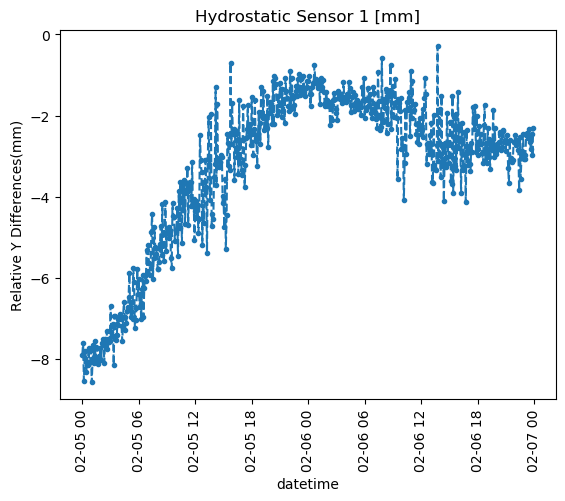

In [54]:


# Assuming 'hydro' DataFrame is already defined and 'Datum' column is converted to datetime

# Convert the 'Datum' column to datetime format if not already done
hydro['Datum'] = pd.to_datetime(hydro['Datum'], format='%d.%m.%Y %H:%M')


plt.plot(hydro['Datum'], hydro['dH [mm]'], '--.')
plt.xlabel('datetime')  # Adding label to x-axis
plt.ylabel('Relative Y Differences(mm)')  # Adding label to y-axis
plt.title('Hydrostatic Sensor 1 [mm]')
plt.xticks(rotation=90)

ax1 = plt.gca()
y_axis = ax1.xaxis

# Adjusting the x-axis locator
ax = plt.gca()  # Get current axis
#ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))  # Adjust base to 10 for wider range

plt.show()


Interpolate the data for both sensors



Resample the data to 60-second intervals and interpolate



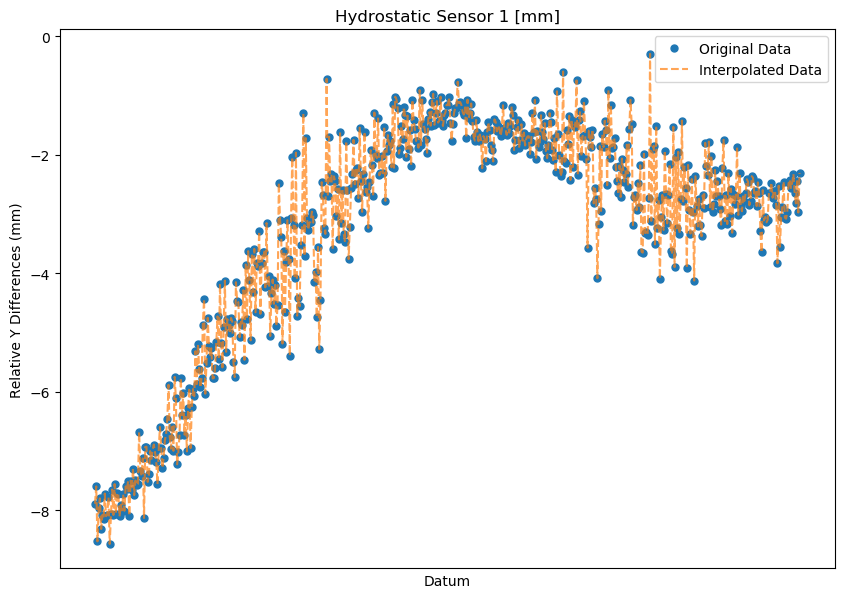

In [63]:


# Convert the 'Datum' column to datetime format if not already done
hydro['Datum'] = pd.to_datetime(hydro['Datum'], format='%d.%m.%Y %H:%M')

# Set 'Datum' as the index
hydro.set_index('Datum', inplace=True)

# Resample the data to 1-minute intervals and interpolate
resampled_hydro = hydro.resample('1T').interpolate(method='linear')

# Plot the original and interpolated data
plt.figure(figsize=(10, 7))

# Plot original data
plt.plot(hydro.index, hydro['dH [mm]'], 'o', label='Original Data', markersize=5)

# Plot interpolated data
plt.plot(resampled_hydro.index, resampled_hydro['dH [mm]'], '--', label='Interpolated Data', alpha=0.7)

plt.xlabel('Datum')
plt.ylabel('Relative Y Differences (mm)')
plt.title('Hydrostatic Sensor 1 [mm]')
plt.legend()
plt.xticks(rotation=90)

ax1 = plt.gca()
y_axis = ax1.xaxis

# Adjusting the x-axis locator if needed (e.g., every 5 minutes)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=5))  # Adjust the base for wider range

plt.show()


In [74]:

# Read the Excel file
fitted_centres_ = pd.read_excel(r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\Glenn\updated_fitting_centres.xlsx")

# Convert the datetime column to string
fitted_centres_['datetime'] = fitted_centres_['datetime'].astype(str)

# Replace '-' with '.' in the date part of the datetime column
fitted_centres_['datetime'] = fitted_centres_['datetime'].str.replace('-', '.', regex=False)

# Display the modified DataFrame
fitted_centres_.head()


,Image,datetime,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm],rel_diff_x[mm],rel_diff_y[mm]
0,IMG_13028_2024-02-05_10-19-23.jpg,2024.02.05 10:19:23,165,199,72.120993,86.982289,0.000000,0.000000
1,IMG_13029_2024-02-05_10-24-31.jpg,2024.02.05 10:24:31,164,188,71.683897,82.174223,-0.437097,-4.808066
2,IMG_13030_2024-02-05_10-29-39.jpg,2024.02.05 10:29:39,163,189,71.246800,82.611320,-0.437097,0.437097
3,IMG_13031_2024-02-05_10-34-47.jpg,2024.02.05 10:34:47,167,195,72.995187,85.233901,1.748388,2.622582
4,IMG_13032_2024-02-05_10-39-55.jpg,2024.02.05 10:39:55,167,196,72.995187,85.670998,0.000000,0.437097


Initial DataFrame:
                               Image            datetime  x_centre[px]  \
0  IMG_13028_2024-02-05_10-19-23.jpg 2024-02-05 10:19:23           165   
1  IMG_13029_2024-02-05_10-24-31.jpg 2024-02-05 10:24:31           164   
2  IMG_13030_2024-02-05_10-29-39.jpg 2024-02-05 10:29:39           163   
3  IMG_13031_2024-02-05_10-34-47.jpg 2024-02-05 10:34:47           167   
4  IMG_13032_2024-02-05_10-39-55.jpg 2024-02-05 10:39:55           167   

   y_centre[px]  x_centre[mm]  y_centre[mm]  rel_diff_x[mm]  rel_diff_y[mm]  
0           199     72.120993     86.982289        0.000000        0.000000  
1           188     71.683897     82.174223       -0.437097       -4.808066  
2           189     71.246800     82.611320       -0.437097        0.437097  
3           195     72.995187     85.233901        1.748388        2.622582  
4           196     72.995187     85.670998        0.000000        0.437097  

DataFrame after datetime conversion:
             datetime  rel_dif

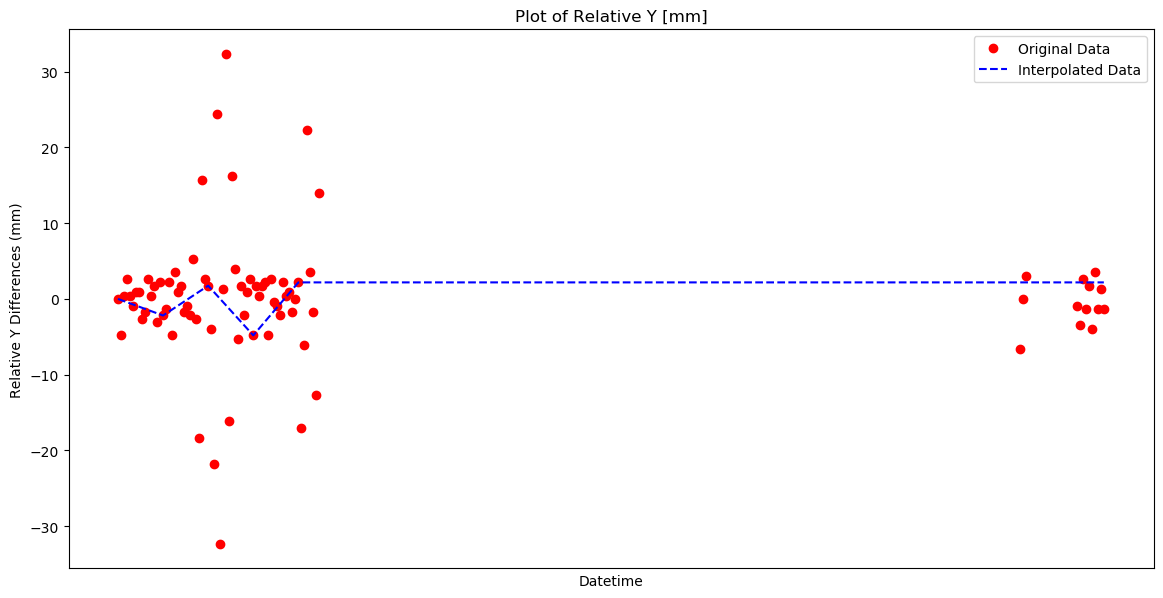

In [83]:

# Read the Excel file
fitted_centres = pd.read_excel(r"C:\Users\kwayi\Desktop\School\MasterArbeite_23.24\Codes\Glenn__upssss\Glenn\updated_fitting_centres.xlsx")

# Print the first few rows of the initial DataFrame
print("Initial DataFrame:")
print(fitted_centres.head())

# Ensure the column name is correct
if 'datetime' in fitted_centres.columns:
    # Convert the datetime column to datetime type
    fitted_centres['datetime'] = pd.to_datetime(fitted_centres['datetime'], format='%Y-%m-%d %H:%M:%S')
    
    # Print the first few rows to check data parsing
    print("\nDataFrame after datetime conversion:")
    print(fitted_centres[['datetime', 'rel_diff_y[mm]']].head())

    # Set 'datetime' as the index
    fitted_centres.set_index('datetime', inplace=True)
    
    # Store original non-null data for plotting
    original_data = fitted_centres[['rel_diff_y[mm]']].copy()
    
    # Check for gaps in the datetime index
    all_times = pd.date_range(start=fitted_centres.index.min(), end=fitted_centres.index.max(), freq='1T')
    fitted_centres = fitted_centres.reindex(all_times)

    # Print the first few rows of the reindexed DataFrame to check gaps
    print("\nDataFrame after reindexing:")
    print(fitted_centres.head(10))

    # Interpolate the missing values
    fitted_centres = fitted_centres.interpolate(method='linear')

    # Print the first few rows of the interpolated DataFrame to check interpolation
    print("\nDataFrame after interpolation:")
    print(fitted_centres.head(10))

    # Plot the resampled (interpolated) data
    plt.figure(figsize=(14, 7))
    
    # Plot original data
    plt.plot(original_data.index, original_data['rel_diff_y[mm]'], 'ro', label='Original Data')
    
    # Plot interpolated data
    plt.plot(fitted_centres.index, fitted_centres['rel_diff_y[mm]'], 'b--', label='Interpolated Data')
    
    plt.xlabel('Datetime')  # Adding label to x-axis
    plt.ylabel('Relative Y Differences (mm)')  # Adding label to y-axis
    plt.title('Plot of Relative Y [mm]')
    plt.xticks(rotation=90)
    
    # Adjusting the x-axis locator to show ticks at a 5-minute interval
    ax = plt.gca()  # Get current axis
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
    
    plt.legend()
    plt.show()
else:
    print("The column 'datetime' is not found in the DataFrame. Please check the column names.")





In [92]:
#fitted_centres.columns

fit = fitted_centres[[ 'Image', 'x_centre[px]', 'y_centre[px]', 'x_centre[mm]', 'y_centre[mm]']]
fit

,Image,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm]
2024-02-05 10:19:23,IMG_13028_2024-02-05_10-19-23.jpg,165.000000,199.000000,72.120993,86.982289
2024-02-05 10:20:23,NaN,165.000000,198.909091,72.120993,86.942553
2024-02-05 10:21:23,NaN,165.000000,198.818182,72.120993,86.902817
2024-02-05 10:22:23,NaN,165.000000,198.727273,72.120993,86.863081
2024-02-05 10:23:23,NaN,165.000000,198.636364,72.120993,86.823345
2024-02-05 10:24:23,NaN,165.000000,198.545455,72.120993,86.783609
2024-02-05 10:25:23,NaN,165.000000,198.454545,72.120993,86.743873
2024-02-05 10:26:23,NaN,165.000000,198.363636,72.120993,86.704136
2024-02-05 10:27:23,NaN,165.000000,198.272727,72.120993,86.664400
2024-02-05 10:28:23,NaN,165.000000,198.181818,72.120993,86.624664


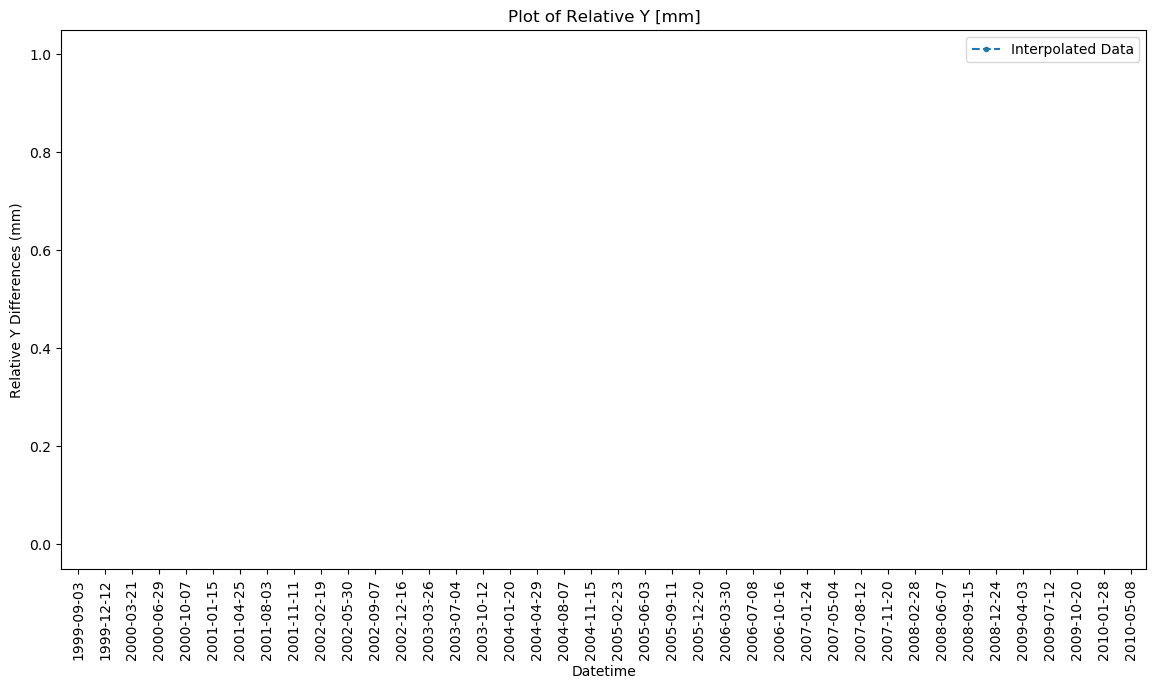

In [ ]:


# Display the DataFrame
#fitted_centres.head()



fitted_centres_['datetime'] = pd.to_datetime(fitted_centres_['datetime'], format='%Y-%m-%d %H:%M:%S')

fitted_centres_.set_index('datetime', inplace=True)

resampled_fitted_centres_ = fitted_centres_.resample('1T').interpolate(method='linear')


plt.figure(figsize=(14, 7))
plt.plot(resampled_fitted_centres_.index, resampled_fitted_centres_['rel_diff_y[mm]'], '--.', label='Interpolated Data')
plt.xlabel('Datetime')
plt.ylabel('Relative Y Differences (mm)')
plt.title('Plot of Relative Y [mm]')
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))

plt.legend()
plt.show()


In [ ]:
fitted_centres.head()
#fitted_centres_['datetime'] 

,Image,x_centre[px],y_centre[px],x_centre[mm],y_centre[mm],rel_diff_x[mm],rel_diff_y[mm]
datetime,,,,,,,
2024-02-05 10:19:23,IMG_13028_2024-02-05_10-19-23.jpg,165,199,72.120993,86.982289,0.000000,0.000000
2024-02-05 10:24:31,IMG_13029_2024-02-05_10-24-31.jpg,164,188,71.683897,82.174223,-0.437097,-4.808066
2024-02-05 10:29:39,IMG_13030_2024-02-05_10-29-39.jpg,163,189,71.246800,82.611320,-0.437097,0.437097
2024-02-05 10:34:47,IMG_13031_2024-02-05_10-34-47.jpg,167,195,72.995187,85.233901,1.748388,2.622582
2024-02-05 10:39:55,IMG_13032_2024-02-05_10-39-55.jpg,167,196,72.995187,85.670998,0.000000,0.437097


Convert all sampled data to a dataframe